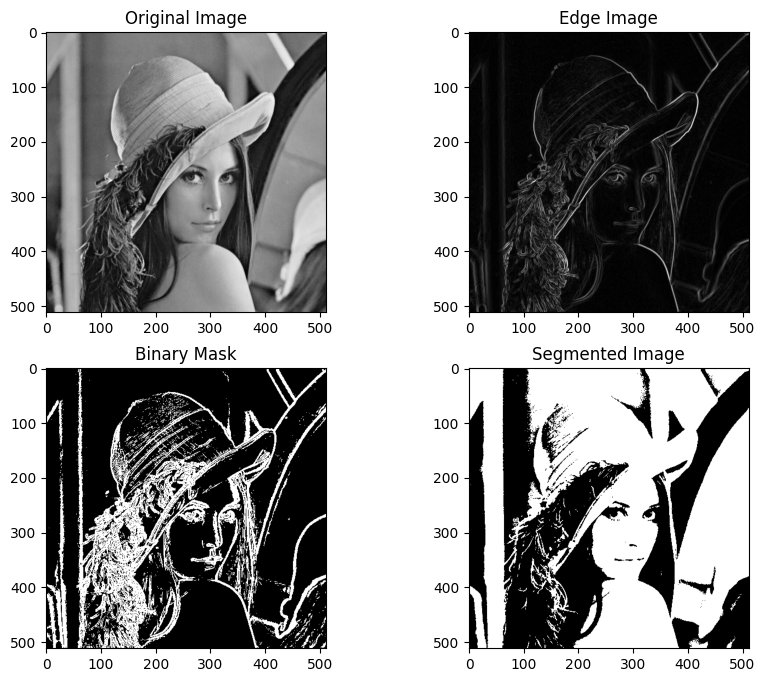

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        # Use Sobel to compute gradient magnitude
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        # Use Laplacian
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    # Apply threshold to get binary image
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.astype(np.uint8)
    return binary_img

def get_strong_edge_pixels(img, binary_mask):
    # Use the binary image as a mask to select pixels from the original image
    strong_edges = img[binary_mask == 255]
    return strong_edges

def compute_histogram(strong_edges):
    # Compute the histogram of the strong edge points
    hist, bins = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img, hist):
    # Segment the image globally using histogram (e.g., Otsu's method)
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

# Load and preprocess image
img = cv2.imread('Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute edge image (choose method: 'gradient' or 'laplacian')
edge_img = compute_edge_image(img, method='gradient')

# Step 2: Specify a threshold value T
T = 50  # You can adjust this value

# Step 3: Threshold the image using the threshold value T
binary_img = threshold_image(edge_img, T)

# Step 4: Get strong edge points from the original image
strong_edges = get_strong_edge_pixels(img, binary_img)

# Step 5: Compute a histogram of the strong edge points
hist = compute_histogram(strong_edges)

# Step 6: Use the histogram to segment the original image globally
segmented_img = global_segmentation(img, hist)

# Display results
plt.figure(figsize=(10,8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2,2,2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
plt.subplot(2,2,3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
plt.subplot(2,2,4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
plt.show()


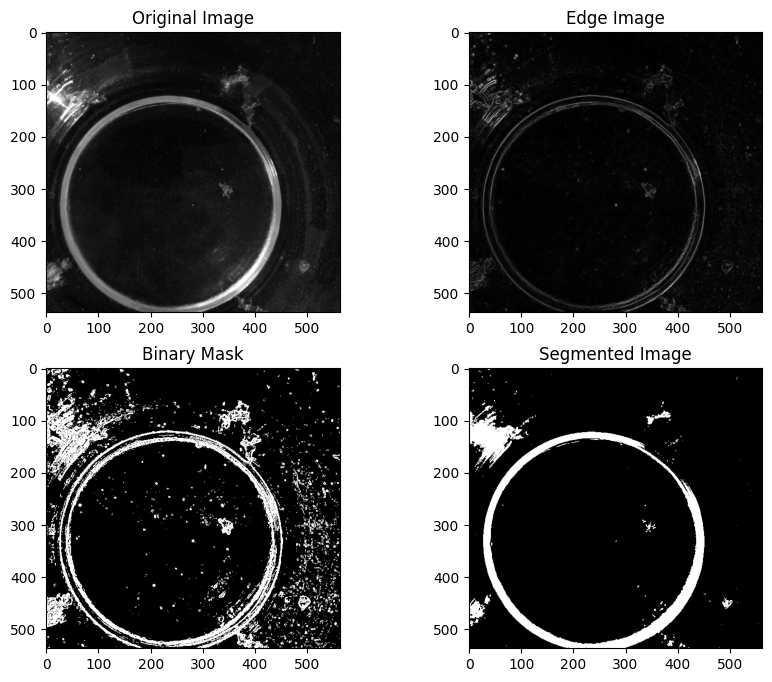

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        # Use Sobel to compute gradient magnitude
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        # Use Laplacian
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    # Apply threshold to get binary image
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.astype(np.uint8)
    return binary_img

def get_strong_edge_pixels(img, binary_mask):
    # Use the binary image as a mask to select pixels from the original image
    strong_edges = img[binary_mask == 255]
    return strong_edges

def compute_histogram(strong_edges):
    # Compute the histogram of the strong edge points
    hist, bins = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img, hist):
    # Segment the image globally using histogram (e.g., Otsu's method)
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

# Load and preprocess image
img = cv2.imread('Rename.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute edge image (choose method: 'gradient' or 'laplacian')
edge_img = compute_edge_image(img, method='gradient')

# Step 2: Specify a threshold value T
T = 50  # You can adjust this value

# Step 3: Threshold the image using the threshold value T
binary_img = threshold_image(edge_img, T)

# Step 4: Get strong edge points from the original image
strong_edges = get_strong_edge_pixels(img, binary_img)

# Step 5: Compute a histogram of the strong edge points
hist = compute_histogram(strong_edges)

# Step 6: Use the histogram to segment the original image globally
segmented_img = global_segmentation(img, hist)

# Display results
plt.figure(figsize=(10,8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2,2,2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
plt.subplot(2,2,3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
plt.subplot(2,2,4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
plt.show()


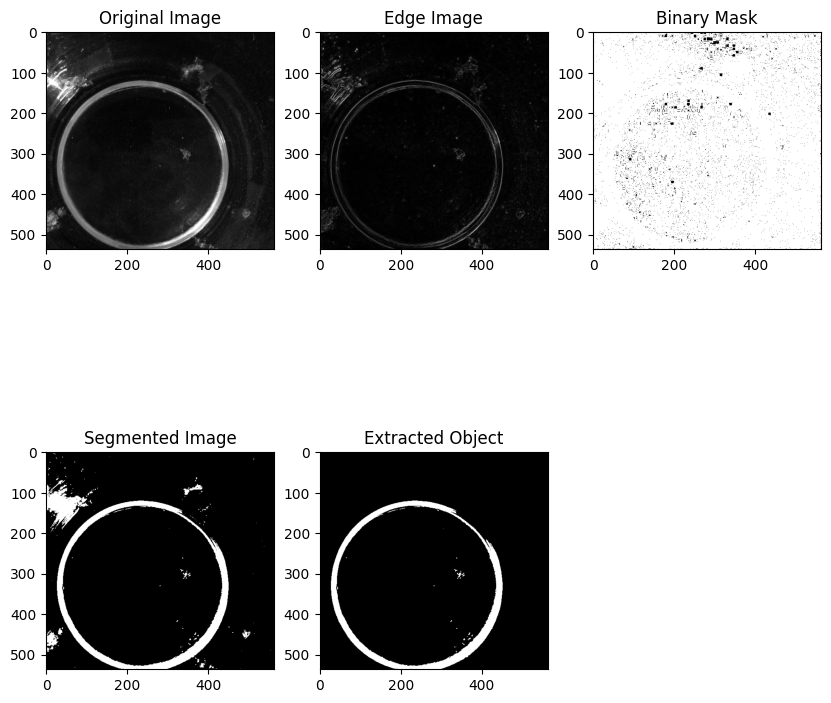

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        # Use Sobel to compute gradient magnitude
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        # Use Laplacian
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    # Apply threshold to get binary image
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.astype(np.uint8)
    return binary_img

def get_strong_edge_pixels(img, binary_mask):
    # Use the binary image as a mask to select pixels from the original image
    strong_edges = img[binary_mask == 255]
    return strong_edges

def compute_histogram(strong_edges):
    # Compute the histogram of the strong edge points
    hist, bins = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img):
    # Segment the image globally using histogram (e.g., Otsu's method)
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

def extract_object(segmented_img):
    # Step 2: Apply binary threshold to isolate bright regions (or adjust according to intensity)
    _, thresh = cv2.threshold(segmented_img, 127, 255, cv2.THRESH_BINARY)

    # Step 3: Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Select the largest contour (assuming it's the region of interest)
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 5: Create a mask from the largest contour
    mask = np.zeros_like(segmented_img)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Step 6: Use the mask to extract the object
    extracted_object = cv2.bitwise_and(segmented_img, segmented_img, mask=mask)

    return extracted_object

# Load and preprocess image
img = cv2.imread('Rename.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute edge image (choose method: 'gradient' or 'laplacian')
edge_img = compute_edge_image(img, method='gradient')

# Step 2: Specify a threshold value T
T = 2  # You can adjust this value

# Step 3: Threshold the image using the threshold value T
binary_img = threshold_image(edge_img, T)

# Step 4: Get strong edge points from the original image
strong_edges = get_strong_edge_pixels(img, binary_img)

# Step 5: Compute a histogram of the strong edge points
hist = compute_histogram(strong_edges)

# Step 6: Use the histogram to segment the original image globally
segmented_img = global_segmentation(img)

# Step 7: Extract the object from the segmented image
extracted_object = extract_object(segmented_img)

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
plt.subplot(2, 3, 3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
plt.subplot(2, 3, 4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
plt.subplot(2, 3, 5), plt.imshow(extracted_object, cmap='gray'), plt.title('Extracted Object')
plt.show()


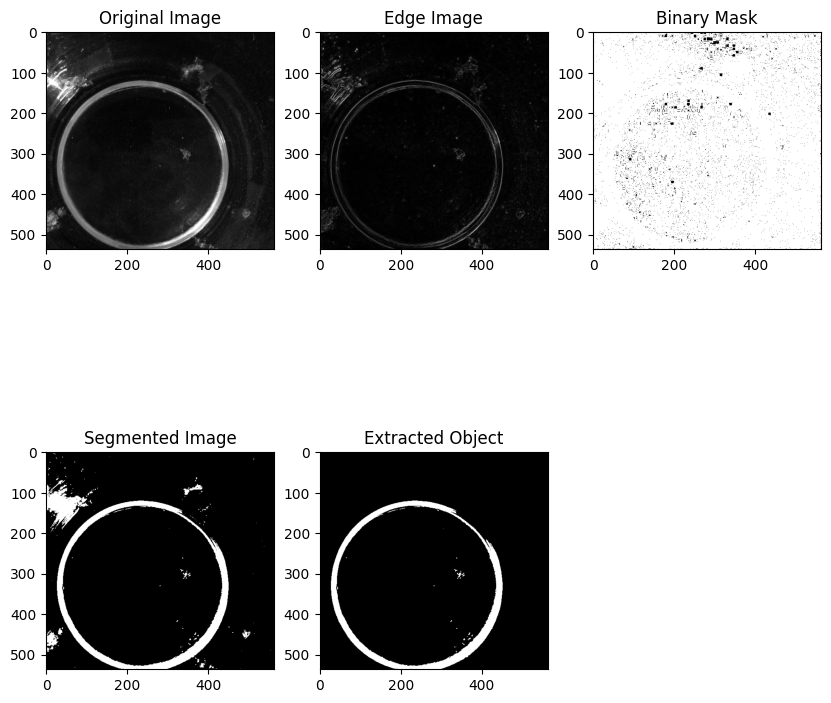

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        # Use Sobel to compute gradient magnitude
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        # Use Laplacian
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    # Apply threshold to get binary image
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.astype(np.uint8)
    return binary_img

def get_strong_edge_pixels(img, binary_mask):
    # Use the binary image as a mask to select pixels from the original image
    strong_edges = img[binary_mask == 255]
    return strong_edges

def compute_histogram(strong_edges):
    # Compute the histogram of the strong edge points
    hist, bins = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img):
    # Segment the image globally using histogram (e.g., Otsu's method)
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

def extract_object(segmented_img):
    # Step 2: Apply binary threshold to isolate bright regions (or adjust according to intensity)
    _, thresh = cv2.threshold(segmented_img, 127, 255, cv2.THRESH_BINARY)

    # Step 3: Find contours in the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Select the largest contour (assuming it's the region of interest)
    largest_contour = max(contours, key=cv2.contourArea)

    # Step 5: Create a mask from the largest contour
    mask = np.zeros_like(segmented_img)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    # Step 6: Use the mask to extract the object
    extracted_object = cv2.bitwise_and(segmented_img, segmented_img, mask=mask)

    return extracted_object

# Load and preprocess image
img = cv2.imread('Rename.jpg', cv2.IMREAD_GRAYSCALE)

# Step 1: Compute edge image (choose method: 'gradient' or 'laplacian')
edge_img = compute_edge_image(img, method='gradient')

# Step 2: Specify a threshold value T
T = 2  # You can adjust this value

# Step 3: Threshold the image using the threshold value T
binary_img = threshold_image(edge_img, T)

# Step 4: Get strong edge points from the original image
strong_edges = get_strong_edge_pixels(img, binary_img)

# Step 5: Compute a histogram of the strong edge points
hist = compute_histogram(strong_edges)

# Step 6: Use the histogram to segment the original image globally
segmented_img = global_segmentation(img)

# Step 7: Extract the object from the segmented image
extracted_object = extract_object(segmented_img)

# Display results
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
plt.subplot(2, 3, 3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
plt.subplot(2, 3, 4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
plt.subplot(2, 3, 5), plt.imshow(extracted_object, cmap='gray'), plt.title('Extracted Object')
plt.show()

# Additional processing with morphological operations
# Load the image again for morphological operations
img_color = cv2.imread('Rename.jpg')

# Convert to grayscale if necessary
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Apply thresholding (if needed)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Perform morphological operations (optional)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the largest contour (assuming it's the object of interest)
largest_contour = max(contours, key=cv2.contourArea)

# Create a mask for the extracted object
mask = np.zeros_like(img_color)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), thickness=-1)

# Extract the object from the original image using the mask
extracted_object_morph = cv2.bitwise_and(img_color, mask)

# Display the extracted object using morphological operations
cv2.imshow('Extracted Object (Morphological)', extracted_object_morph)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_edge_image(img, method='gradient'):
    if method == 'gradient':
        grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        edge_img = np.sqrt(grad_x**2 + grad_y**2)
    elif method == 'laplacian':
        edge_img = cv2.Laplacian(img, cv2.CV_64F)
        edge_img = np.abs(edge_img)
    else:
        raise ValueError("Unknown method. Use 'gradient' or 'laplacian'.")
    return edge_img

def threshold_image(edge_img, T):
    _, binary_img = cv2.threshold(edge_img, T, 255, cv2.THRESH_BINARY)
    return binary_img.astype(np.uint8)

def get_strong_edge_pixels(img, binary_mask):
    return img[binary_mask == 255]

def compute_histogram(strong_edges):
    hist, _ = np.histogram(strong_edges, bins=256, range=(0, 256))
    return hist

def global_segmentation(img):
    _, segmented_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return segmented_img

def extract_object(segmented_img):
    _, thresh = cv2.threshold(segmented_img, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    
    mask = np.zeros_like(segmented_img)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
    extracted_object = cv2.bitwise_and(segmented_img, segmented_img, mask=mask)
    return extracted_object

# Load the image
image = cv2.imread('Rename.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Edge Detection
edge_img = compute_edge_image(gray_image, method='gradient')
T = 50  # You can adjust this value
binary_img = threshold_image(edge_img, T)
strong_edges = get_strong_edge_pixels(gray_image, binary_img)
hist = compute_histogram(strong_edges)
segmented_img = global_segmentation(gray_image)
extracted_object = extract_object(segmented_img)

# Step 2: Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(blurred_image, 
                           cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
                           param1=50, param2=30, minRadius=50, maxRadius=150)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # Create a mask for the circles
    mask = np.zeros_like(gray_image)

    # Draw the detected circles on the mask
    for (x, y, r) in circles:
        cv2.circle(mask, (x, y), r, 255, thickness=-1)

    # Step 3: Extract the region inside the circle
    segmented_image_circles = cv2.bitwise_and(gray_image, gray_image, mask=mask)

    # Step 4: Display the results
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 3, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(edge_img, cmap='gray'), plt.title('Edge Image')
    plt.subplot(2, 3, 3), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Mask')
    plt.subplot(2, 3, 4), plt.imshow(segmented_img, cmap='gray'), plt.title('Segmented Image')
    plt.subplot(2, 3, 5), plt.imshow(extracted_object, cmap='gray'), plt.title('Extracted Object')
    plt.subplot(2, 3, 6), plt.imshow(segmented_image_circles, cmap='gray'), plt.title('Segmented Circles')
    plt.show()
    
else:
    print("No circles were found")

# Additional processing with morphological operations
img_color = cv2.imread('Rename.jpg')
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
eroded = cv2.erode(thresh, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel, iterations=1)

contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

mask = np.zeros_like(img_color)
cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), thickness=-1)
extracted_object_morph = cv2.bitwise_and(img_color, mask)

# Display the extracted object using morphological operations
cv2.imshow('Extracted Object (Morphological)', extracted_object_morph)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'blurred_image' is not defined